#  <span style="color:Dark gry">IMDb Movie Review Sentiment Analysis</span>

## Project video Explanation Link :-
https://drive.google.com/file/d/1ilhYrqvg6ScBaCbgdJKi6_L0JmDMdqYw/view?usp=sharing

## <span style="color:Green">Overview

- Sentiment analysis is a Natural Language Processing (NLP) task that focuses on determining the emotional tone of a given text. This emotional tone can be classified into categories such as positive or negative.
- In simple terms, sentiment analysis helps understand whether a piece of text expresses a positive, negative, or neutral sentiment.
- In this project, the goal is to analyze movie reviews from the IMDb dataset. We aim to predict whether the sentiment of a given review is positive or negative based on the text of the review.
- Basically Sentimental analysis helps in understanding how people feel about a certain topic based on the text they write ,which is especially valuable for industries like entertainment ,marketing and e commerce
## <span style="color:ORANGE">Why Sentimental Analysis Useful
- For Movie Produces and Marketeres
    - Understanding Public opinion :- Movie producers and marketers can use sentiment analysis to quickly and efficiently understand how the audience feels about a movie. By analyzing a large number of reviews, they can identify overall public sentiment — whether most people are enjoying the movie or finding it disappointing.
    - Tailor Marketing Strategies: If a movie is receiving positive feedback, marketers might boost promotional efforts or focus on emphasizing aspects of the movie that are generating excitement. If the sentiment is mostly negative, producers might choose to adjust marketing strategies, like addressing criticisms or focusing on the film's strengths.
- For Platforms like IMDb
    - Automatic Classification of Reviews: Platforms like IMDb have millions of user-generated reviews. Sorting through each review manually is not feasible, so sentiment analysis allows these platforms to automatically classify reviews as positive or negative. This makes it easier for users to see the general sentiment without reading every single review. Help Users Make Quick Decisions: By providing an overview of sentiment (e.g., “80% of users gave this movie a positive rating”), platforms help users quickly understand how a movie is generally perceived. This can influence a viewer’s decision to watch a movie or not.

# <span style="color:ORANGE">Main Goal Of the Project

The goal of this project is to develop a machine learning model that can classify movie reviews from the IMDb dataset as positive or negative based on the text of the review.
The Steps involved in the process are:
- Text Preprocessing :- Cleaning and preparing the text data to be fed into the machine learning model. This can include removing stop words, converting text to lowercase, and other transformations.
- Feature Extraction: Transforming the raw text data into a numerical format that the machine learning model can understand. Techniques like TF-IDF (Term Frequency-Inverse Document Frequency) are commonly used.
- Model Training: Using machine learning algorithms such as Logistic Regression, Naive Bayes, or SVM to learn patterns in the data and make predictions about sentiment.
- Evaluation: Assessing the model’s performance using various metrics such as:
    - Accuracy: How often the model makes correct predictions.
    - Precision: The proportion of true positive predictions (i.e., positive sentiment predictions that are actually positive).
    - Recall: The proportion of actual positive sentiments correctly identified by the model.
    - F1-score: A balance between precision and recall, especially useful when there’s an uneven class distribution (e.g., more negative reviews than positive).
- Example
   - Review: "The movie was absolutely fantastic! Great acting and storyline."
  - Sentiment: Positive

- Conclusion
  - The IMDb sentiment analysis project uses machine learning to automatically classify movie reviews into positive and negative categories. By applying various text preprocessing techniques (like cleaning, lemmatizing) and feature extraction methods (like TF-IDF), we can train a model to predict the sentiment of reviews with high accuracy. This has practical applications for movie producers, critics, and platforms like IMDb.

#  <span style="color:ORANGE">Dataset Information

The IMDb dataset typically consists of the following two main components:

1. Text of the Review:

  - This is the actual text that the user writes about the movie. The reviews can be long or short and are free-form text. For example:

       - "I loved the action scenes and the character development."

    - "The movie was very slow and predictable."

   - The model’s task is to process this text and extract meaningful features to predict sentiment.

2. Sentiment Label:

- Each review is labeled as either positive or negative.

    - Positive sentiment: If the review expresses satisfaction or praise, it is labeled as positive.

   - Negative sentiment: If the review expresses dissatisfaction or criticism, it is labeled as negative.

In [1]:
# Import libraries 
import pandas as pd # this for data manipulation and data analysis 
import numpy as np # this is for numerical operations and array handling 
import seaborn as sns # visulization
import matplotlib.pyplot as plt

import re # Regular expressions used for cleaning text 
import string #Useful for handling punctuation and string constants.
import nltk # provides tools for text processing like tokenization, stopwords, lemmatization, etc.

# Download NLTK resources (only once)
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords # A list of common words (like "the", "is") that are often removed from text.
from nltk.tokenize import word_tokenize # Splits text into individual words (tokens)
from gensim.models import Word2Vec  # Used for converting words into vector representations (word embeddings)
from nltk.stem import WordNetLemmatizer, PorterStemmer # Reduces words to their base form
from sklearn.feature_extraction.text import TfidfVectorizer # Converts text into numerical vectors using TF-IDF (Term Frequency–Inverse Document Frequency). Helps weigh important words
from sklearn.feature_extraction.text import CountVectorizer #Converts text into numerical vectors based on raw word counts (bag-of-words).

from sklearn.model_selection import train_test_split # Splits your dataset into training and testing sets.

from sklearn.linear_model import LogisticRegression # A simple, fast linear model for binary classification tasks (like sentiment). 
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier ideal for text data and word counts.
from sklearn.svm import LinearSVC # A linear Support Vector Machine, effective for large feature spaces like TF-IDF.
from sklearn.ensemble import RandomForestClassifier # an ensemble method using multiple decision trees. Works well on many types of data.


from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler # Standardizes numerical features 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df=pd.read_csv('Imdb - data_imdb.csv')

# <span style="color:ORANGE">Data Exploration and Preprocessing

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
df.shape

(50000, 2)

In [6]:
df.columns #Its shows the columns 

Index(['review', 'sentiment'], dtype='object')

In [7]:
df.info() #its shows the information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df.duplicated().sum() #Its shows the duplicated values

419

In [10]:
# Remove all duplicate rows
df.drop_duplicates(inplace=True)
# Confirm removal
print(f" New dataset size after removing duplicates: {df.shape[0]} rows")

 New dataset size after removing duplicates: 49581 rows


In [11]:
# Count each sentiment class
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24697
Name: count, dtype: int64

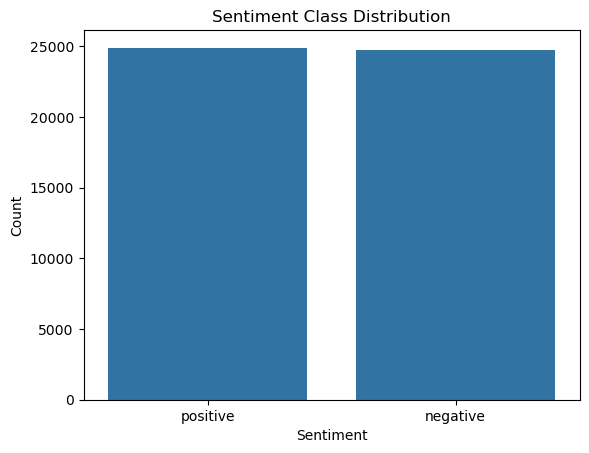

In [12]:
# Bar plot for sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
# Create a new column for number of words in each review
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

In [14]:
# Describe review lengths
df['review_length'].describe()

count    49581.000000
mean       231.344366
std        171.546644
min          1.000000
25%        126.000000
50%        173.000000
75%        281.000000
max       2470.000000
Name: review_length, dtype: float64

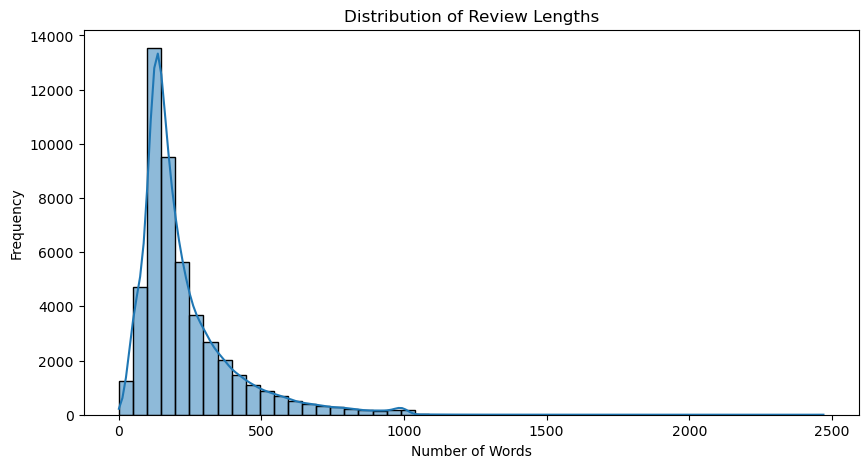

In [15]:
# Plot histogram of review lengths
plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Calculate review length
df['review_length'] = df['review'].apply(len)

# Calculate IQR (Interquartile Range)
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 3705


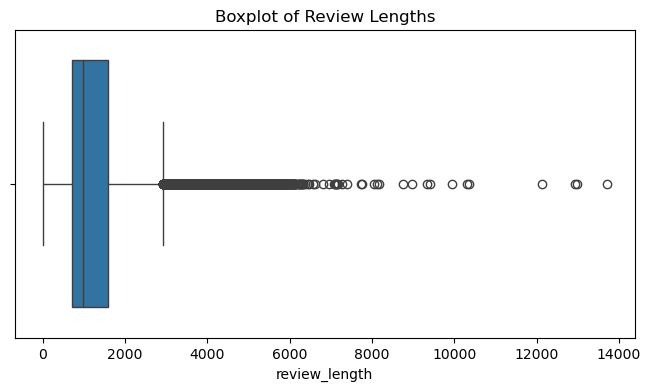

In [17]:
# Box plot for review lengths
plt.figure(figsize=(8,4))
sns.boxplot(x=df['review_length'])
plt.title("Boxplot of Review Lengths")
plt.show()

In [18]:
# Truncate to max 300 words
MAX_WORDS = 300
df['review'] = df['review'].apply(
    lambda x: ' '.join(x.split()[:MAX_WORDS])
)

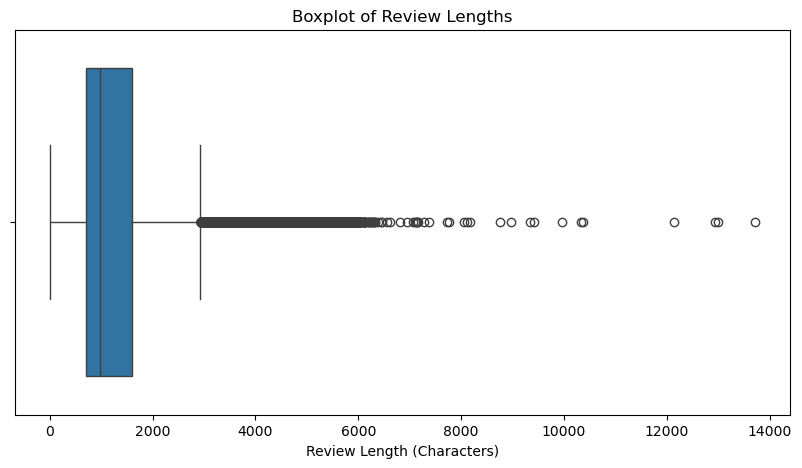

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='review_length')
plt.title('Boxplot of Review Lengths')
plt.xlabel('Review Length (Characters)')
plt.show()

## <span style="color:ORANGE">Perform data cleaning and text preprocessing

In [20]:
# Set of stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower() # makes the data uniform
    
    # Remove punctuation and special characters using regex
    text = re.sub(r"[^a-zA-Z\s]", "", text) # This cleans the text and reduces the noises 
    
    # Tokenize (split into words)
    tokens = word_tokenize(text) # Breaks the text into a tokens manner 
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words] # Removing them helps models focus on important words
    
    # Apply lemmatization and stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #Improves consistency in tokens for modeling.
    tokens = [stemmer.stem(word) for word in tokens] #Reduces words to their root form, even if it's not a valid word. 
    
    # Join back into string
    return " ".join(tokens)


In [21]:
# Apply the cleaning function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)
# Show a few cleaned reviews
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


# <span style="color:ORANGE">Feature Engineering

In [22]:
# Initialize vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)
# Fit and transform cleaned reviews
X_bow = bow_vectorizer.fit_transform(df['cleaned_review'])
# View shape
print("Bag-of-Words shape:", X_bow.shape)

Bag-of-Words shape: (49581, 5000)


In [23]:

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform cleaned reviews
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])
# View shape
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (49581, 5000)


In [24]:
# Word count
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
# Character count (excluding spaces)
df['char_count'] = df['cleaned_review'].apply(lambda x: len(x.replace(" ", "")))

# Average word length
df['avg_word_length'] = df['char_count'] / df['word_count']

# Punctuation count (from original text)
df['punctuation_count'] = df['review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Capital words count (e.g., SHOUTING)
df['capital_word_count'] = df['review'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))

# Print sample
df[['cleaned_review', 'word_count', 'char_count', 'avg_word_length', 'punctuation_count', 'capital_word_count']].head()


,cleaned_review,word_count,char_count,avg_word_length,punctuation_count,capital_word_count
0,one review mention watch oz episod youll hook ...,166,868,5.228916,77,8
1,wonder littl product br br film techniqu unass...,90,494,5.488889,44,2
2,thought wonder way spend time hot summer weeke...,87,448,5.149425,40,3
3,basic there famili littl boy jake think there ...,70,353,5.042857,42,3
4,petter mattei love time money visual stun film...,130,653,5.023077,56,1


In [25]:
df.head()

,review,sentiment,review_length,cleaned_review,word_count,char_count,avg_word_length,punctuation_count,capital_word_count
0,One of the other reviewers has mentioned that ...,positive,1761,one review mention watch oz episod youll hook ...,166,868,5.228916,77,8
1,A wonderful little production. <br /><br />The...,positive,998,wonder littl product br br film techniqu unass...,90,494,5.488889,44,2
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonder way spend time hot summer weeke...,87,448,5.149425,40,3
3,Basically there's a family where a little boy ...,negative,748,basic there famili littl boy jake think there ...,70,353,5.042857,42,3
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visual stun film...,130,653,5.023077,56,1


In [26]:
# Select custom features
custom_features = df[['word_count', 'char_count', 'avg_word_length', 'punctuation_count', 'capital_word_count']]

# Scale custom features (important for ML models)
scaler = StandardScaler()
custom_scaled = scaler.fit_transform(custom_features)

# Combine TF-IDF and handcrafted features
from scipy import sparse
X_final = hstack([X_tfidf, sparse.csr_matrix(custom_scaled)])

print("Final feature matrix shape:", X_final.shape)


Final feature matrix shape: (49581, 5005)


In [27]:
print(X_final)

  (0, 3097)	0.02270390737863816
  (0, 3675)	0.053335886647185325
  (0, 2780)	0.05857394278014083
  (0, 4825)	0.08857712362604898
  (0, 3156)	0.4742117589875961
  (0, 1482)	0.11320018257272392
  (0, 4986)	0.059985523213559835
  (0, 2128)	0.07928107889191949
  (0, 3698)	0.09399399121965579
  (0, 1532)	0.06325733274042945
  (0, 2006)	0.046527938409106226
  (0, 2759)	0.08287662836066832
  (0, 515)	0.06491903357634132
  (0, 1682)	0.06937514717589313
  (0, 4466)	0.035782417398636246
  (0, 4267)	0.18034147973503534
  (0, 562)	0.07457472564710403
  (0, 3829)	0.03488447976791222
  (0, 4765)	0.260692455526634
  (0, 3923)	0.04520302991872638
  (0, 4931)	0.05522007577727962
  (0, 1892)	0.06383340558570359
  (0, 4608)	0.07717433837684594
  (0, 3980)	0.14961458313037387
  (0, 2042)	0.05970932029584782
  :	:
  (49580, 2482)	0.12011135211898728
  (49580, 4660)	0.1099994546327051
  (49580, 2548)	0.10293229553117461
  (49580, 297)	0.12239314223959458
  (49580, 2015)	0.13621988889395478
  (49580, 3625)	0

In [28]:
# Tokenize text for Word2Vec
tokenized = df['cleaned_review'].apply(lambda x: x.split())
# Train Word2Vec model on IMDb data
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2)
# View vector for a word
print(w2v_model.wv['great']) 

[ 0.05680284 -1.0018942  -0.2380526   1.7793915  -1.7383139   1.3795747
  0.2856369  -0.6831962   1.0448724   2.4887307   0.03745561  2.5004106
  0.06588718  1.8421642  -0.3283551  -1.0171177   0.43085942 -0.617304
 -0.50699055 -1.3850089   1.8701481  -2.102138    0.57669175  0.5282399
 -0.62170905  0.88700527 -0.18647726  0.5820207   2.6204147  -0.73479325
  1.6009176   0.16470371 -0.6310412  -0.36981338  0.6152704   1.4938735
 -0.665607   -2.4688911  -1.694216   -0.9319696   0.82458526 -0.46248114
  2.0576148  -1.2457587   0.5321908   0.24162917 -1.1038243  -0.7237378
 -0.67508876 -1.6802835   0.25233606 -0.22768411 -1.0452411  -2.067141
  0.5741474  -1.2979047  -0.29280746  0.20445858 -1.3374768  -2.119507
  0.14152603 -0.83679295 -1.785369    1.2132968  -1.5662911   2.181165
  0.00538575  1.4372468  -2.8634405   1.5514265   1.0623903  -0.49258107
 -0.0365254   0.35323316  0.2447177  -1.5507253   1.7705976   0.81843036
  1.5477973   1.921829   -1.2628145  -1.8185982   1.1268672  -0.

In [29]:
# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

In [30]:

# Convert sentiment to binary values
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (39664, 5005)
Test set size: (9917, 5005)


## <span style="color:ORANGE">Model Development

## <span style="color:ORANGE">Model Evalution Function

In [31]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

# Global list to store model performance
model_results = []

def evaluate_model(y_test, y_pred, model_name, show_matrix=True):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    
    # ROC-AUC (ensure binary probabilities or predicted labels)
    try:
        auc = roc_auc_score(y_test, y_pred)
    except:
        auc = None

    print(f" Evaluation Metrics for: {model_name}")
    print("-" * 40)
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"ROC-AUC   : {auc:.4f}" if auc is not None else "ROC-AUC   : Not applicable")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    if show_matrix:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix - {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    # Append to global results
    model_results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': auc
    })

## <span style="color:ORANGE">Logistic Regression model

 Evaluation Metrics for: Logistic Regression
----------------------------------------
Accuracy  : 0.8761
Precision : 0.8709
Recall    : 0.8841
F1-Score  : 0.8775
ROC-AUC   : 0.8760

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4940
           1       0.87      0.88      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



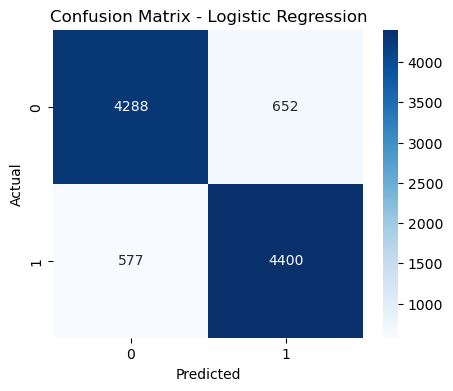

In [32]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate using function
evaluate_model(y_test, y_pred_lr, model_name='Logistic Regression')

## <span style="color:ORANGE">Naive Bayes model

 Evaluation Metrics for: Naive Bayes
----------------------------------------
Accuracy  : 0.8435
Precision : 0.8411
Recall    : 0.8485
F1-Score  : 0.8448
ROC-AUC   : 0.8435

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4940
           1       0.84      0.85      0.84      4977

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



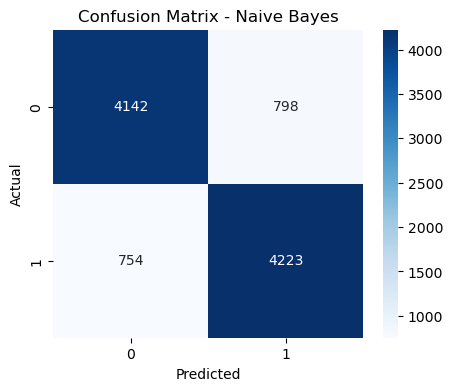

In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train[:, :5000], y_train)
y_pred_nb = nb_model.predict(X_test[:, :5000])
evaluate_model(y_test, y_pred_nb, model_name='Naive Bayes')

## <span style="color:ORANGE">Support Vector Machine

 Evaluation Metrics for: Support Vector Machine
----------------------------------------
Accuracy  : 0.8691
Precision : 0.8656
Recall    : 0.8750
F1-Score  : 0.8703
ROC-AUC   : 0.8691

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4940
           1       0.87      0.88      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



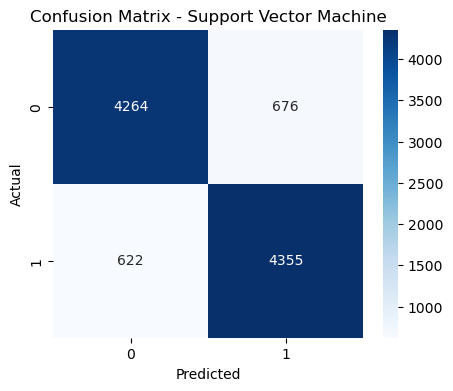

In [34]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test, y_pred_svm, model_name='Support Vector Machine')

## <span style="color:ORANGE">Random Forest

 Evaluation Metrics for: Random Forest
----------------------------------------
Accuracy  : 0.8333
Precision : 0.8371
Recall    : 0.8292
F1-Score  : 0.8331
ROC-AUC   : 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4940
           1       0.84      0.83      0.83      4977

    accuracy                           0.83      9917
   macro avg       0.83      0.83      0.83      9917
weighted avg       0.83      0.83      0.83      9917



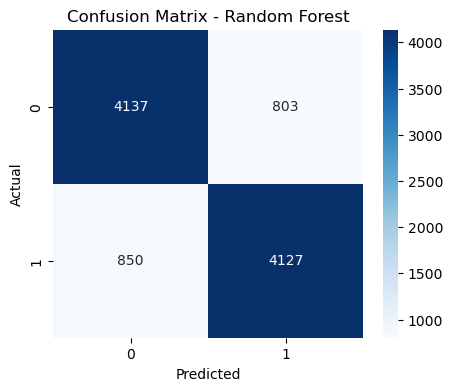

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

evaluate_model(y_test, y_pred_rf, model_name='Random Forest')

## <span style="color:ORANGE">Decision tree model

 Evaluation Metrics for: Decision Tree
----------------------------------------
Accuracy  : 0.7099
Precision : 0.7069
Recall    : 0.7209
F1-Score  : 0.7138
ROC-AUC   : 0.7099

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      4940
           1       0.71      0.72      0.71      4977

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917



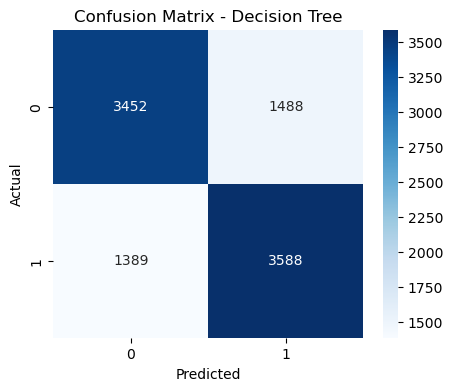

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train[:, :5000], y_train)
y_pred_dt = dt_model.predict(X_test[:, :5000])
evaluate_model(y_test, y_pred_dt, model_name='Decision Tree')

## <span style="color:ORANGE">Gradient Boosting model

 Evaluation Metrics for: Gradient Boosting
----------------------------------------
Accuracy  : 0.8021
Precision : 0.7672
Recall    : 0.8694
F1-Score  : 0.8151
ROC-AUC   : 0.8018

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      4940
           1       0.77      0.87      0.82      4977

    accuracy                           0.80      9917
   macro avg       0.81      0.80      0.80      9917
weighted avg       0.81      0.80      0.80      9917



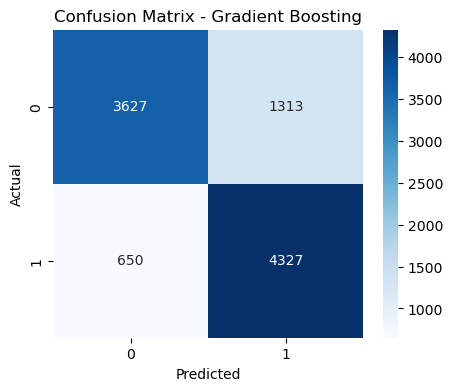

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train[:, :5000], y_train)
y_pred_gb = gb_model.predict(X_test[:, :5000])
evaluate_model(y_test, y_pred_gb, model_name='Gradient Boosting')


## <span style="color:ORANGE">K-Nearest neighbour model

 Evaluation Metrics for: K-Nearest Neighbors
----------------------------------------
Accuracy  : 0.7462
Precision : 0.7147
Recall    : 0.8226
F1-Score  : 0.7649
ROC-AUC   : 0.7459

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.72      4940
           1       0.71      0.82      0.76      4977

    accuracy                           0.75      9917
   macro avg       0.75      0.75      0.74      9917
weighted avg       0.75      0.75      0.74      9917



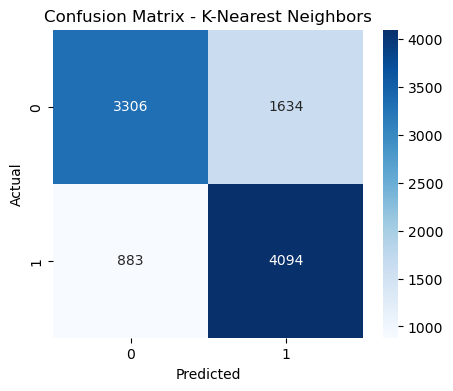

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train[:, :5000], y_train)
y_pred_knn = knn_model.predict(X_test[:, :5000])
evaluate_model(y_test, y_pred_knn, model_name='K-Nearest Neighbors')

## <span style="color:ORANGE">XGBoost model

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Evaluation Metrics for: XGBoost
----------------------------------------
Accuracy  : 0.8440
Precision : 0.8277
Recall    : 0.8704
F1-Score  : 0.8485
ROC-AUC   : 0.8439

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4940
           1       0.83      0.87      0.85      4977

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



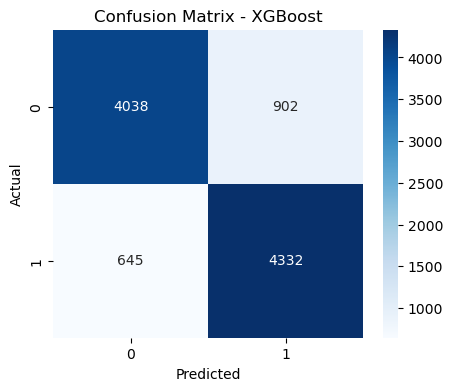

In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train[:, :5000], y_train)
y_pred_xgb = xgb_model.predict(X_test[:, :5000])
evaluate_model(y_test, y_pred_xgb, model_name='XGBoost')


## <span style="color:ORANGE">LightGBM Model

[LightGBM] [Info] Number of positive: 19907, number of negative: 19757
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.575380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 497922
[LightGBM] [Info] Number of data points in the train set: 39664, number of used features: 4999
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501891 -> initscore=0.007564
[LightGBM] [Info] Start training from score 0.007564
 Evaluation Metrics for: LightGBM
----------------------------------------
Accuracy  : 0.8507
Precision : 0.8394
Recall    : 0.8686
F1-Score  : 0.8538
ROC-AUC   : 0.8506

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4940
           1       0.84      0.87      0.85      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85     

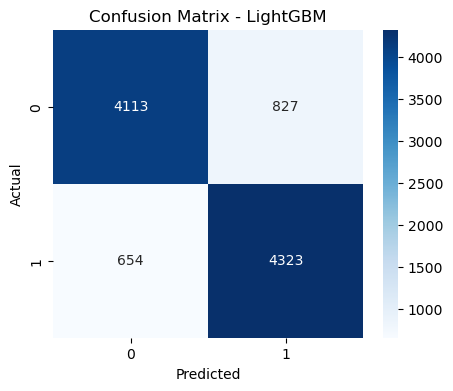

In [40]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model.fit(X_train[:, :5000], y_train)
y_pred_lgb = lgb_model.predict(X_test[:, :5000])
evaluate_model(y_test, y_pred_lgb, model_name='LightGBM')

## Comparision Table

In [41]:
results_df = pd.DataFrame(model_results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.876071,0.870942,0.884067,0.877455,0.876041
1,Support Vector Machine,0.869114,0.865633,0.875025,0.870304,0.869092
2,LightGBM,0.850660,0.839417,0.868596,0.853757,0.850593
3,XGBoost,0.844005,0.827665,0.870404,0.848497,0.843906
4,Naive Bayes,0.843501,0.841068,0.848503,0.844769,0.843482
5,Random Forest,0.833317,0.837120,0.829214,0.833148,0.833332
6,Gradient Boosting,0.802057,0.767199,0.869399,0.815108,0.801805
7,K-Nearest Neighbors,0.746193,0.714735,0.822584,0.764876,0.745907
8,Decision Tree,0.709892,0.706856,0.720916,0.713817,0.709851


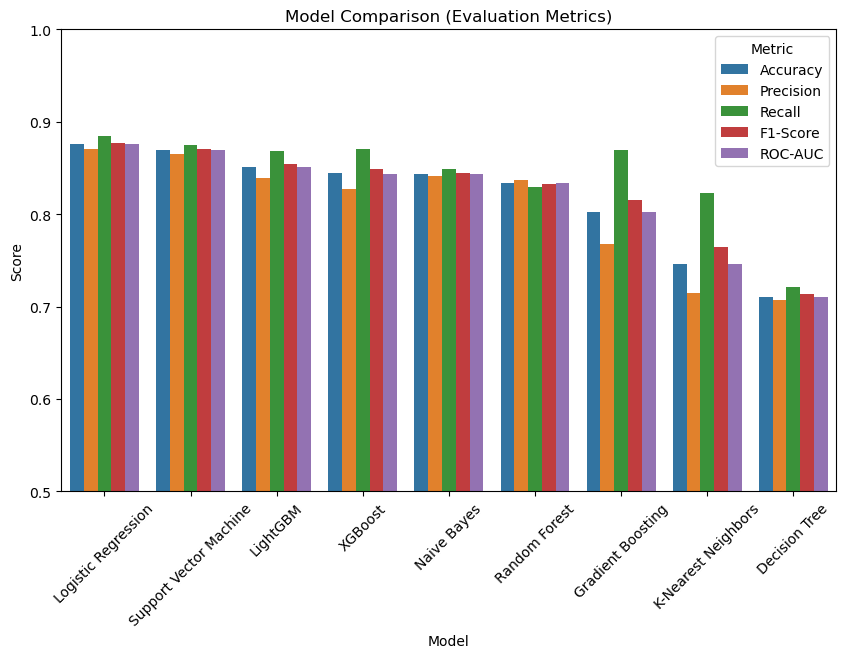

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Model Comparison (Evaluation Metrics)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)
plt.legend(title='Metric')
plt.show()

In [43]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

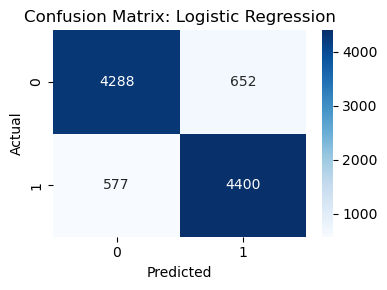

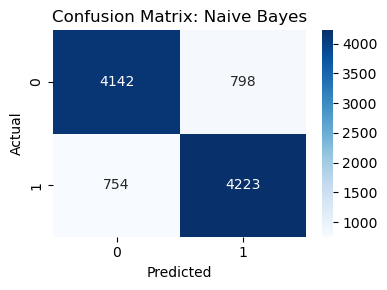

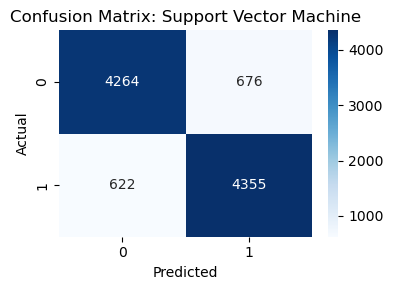

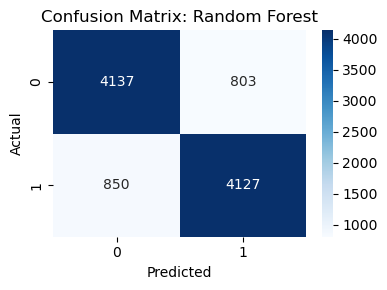

In [44]:
# Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

# Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')

# SVM
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine')

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')



In [46]:
# Split data
train_texts, test_texts, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Train model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [48]:
def clean_text(text):
    # Simple text cleaning (can be customized)
    return text.lower().strip()

def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = lr_model.predict(vectorized)
    return 'Positive 😀' if prediction[0] == 1 else 'Negative 😞'
user_input = input("Enter a movie review: ")
print("Predicted Sentiment:", predict_sentiment(user_input))


Enter a movie review:  "This was a complete waste of time. The plot was predictable, the acting was terrible, and I couldn’t wait for it to end. Definitely one of the worst movies ever made."


Predicted Sentiment: Negative 😞
